In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob,os
import seaborn as sns
%matplotlib inline

In [71]:
path= r'C:\Users\somya\Downloads\states_cur'

In [72]:
#Creating the dataframe from the multiple file files
all_files=glob.glob(path+'\*.csv')

li=[]

for filename in all_files:
    df = pd.read_csv(filename,index_col=None, header=0, encoding='cp1252')
    df=df[['Item','2014-15']]
    df=df.T
    new_header=df.iloc[0]
    df=df[1:]
    df.columns=new_header
    df['State'] = filename.split('\\')[-1].split('-')[1]
    li.append(df)
    
df = pd.concat(li, axis=0, ignore_index=True)

C:\Users\somya\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


In [73]:
pd.set_option('display.max_columns',500)
df=df.loc[:,df.isna().sum(axis=0)/len(df)<0.8]
df.columns

Index(['Agriculture, forestry and fishing', 'Air transport',
       'Communication & services related to broadcasting', 'Construction',
       'Crops', 'Electricity, gas, water supply & other utility services',
       'Financial services', 'Fishing and aquaculture', 'Forestry and logging',
       'Gross State Domestic Product', 'Hotels & restaurants', 'Livestock',
       'Manufacturing', 'Mining and quarrying', 'Other services',
       'Per Capita GSDP (Rs.)', 'Population ('00)', 'Primary',
       'Public administration', 'Railways',
       'Real estate, ownership of dwelling & professional services',
       'Road transport', 'Secondary', 'Services incidental to transport',
       'State', 'Storage', 'Subsidies on products',
       'TOTAL GSVA at basic prices', 'Taxes on Products', 'Tertiary',
       'Trade & repair services', 'Trade, repair, hotels and restaurants',
       'Transport, storage, communication & services related to broadcasting',
       'Water transport'],
      dtype='o

In [74]:
#checking for the missing values in the dataframe
print(df.isnull().sum(axis=0))
print(df.isnull().values.any())
print(df.isnull().values.sum())
print(len(df))

Agriculture, forestry and fishing                                       0
Air transport                                                           3
Communication & services related to broadcasting                        0
Construction                                                            0
Crops                                                                   0
Electricity, gas, water supply & other utility services                 0
Financial services                                                      0
Fishing and aquaculture                                                 0
Forestry and logging                                                    0
Gross State Domestic Product                                            0
Hotels & restaurants                                                    2
Livestock                                                               0
Manufacturing                                                           0
Mining and quarrying                  

In [75]:
df.set_index('State',inplace=True)
print(df)

                  Agriculture, forestry and fishing Air transport  \
State                                                               
Andhra_Pradesh                             14819416         14900   
Arunachal_Pradesh                            686117             0   
Assam                                       3855548         26223   
Bihar                                       7951890         13599   
Chandigarh                                    16233         12391   
Chhattisgarh                                3948847          9507   
Delhi                                        250568        420460   
Goa                                          308507         46359   
Gujarat                                   1.377e+07           NaN   
Haryana                                 8.01524e+06           NaN   
Himachal_Pradesh                            1514981          3979   
Jharkhand                                   3211065          6716   
Karnataka                         

In [76]:
#sorting the dataframe according the index
df.sort_index()

,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,Hotels & restaurants,Livestock,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Population ('00),Primary,Public administration,Railways,"Real estate, ownership of dwelling & professional services",Road transport,Secondary,Services incidental to transport,Storage,Subsidies on products,TOTAL GSVA at basic prices,Taxes on Products,Tertiary,Trade & repair services,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Andhra_Pradesh,14819416,14900,928756,4664889,7893514,1151729,1900863,2270664,346160,52646842,517400,4309078,4672266,1484300,4215389,104977,501510,16303716,2200897,424228,4405409,2816000,10488884,780200,18700,1690800,48825542,5512100,22032942,3716000,4233400,5076984,94200
Arunachal_Pradesh,686117,0,19568,147842,415520,113527,25207,8193,224017,1676119,3625,38387,26120,30842,218728,112718,14870,716959,243867,59,48418,15467,287489,109,0,30272,1636292,70099,631844,56796,60421,35203,0
Assam,3855548,26223,357619,1733568,2890544,296587,543651,529539,261987,19809800,110904,173478,2002936,1471149,1795658,60621,326780,5326697,1373611,252509,1412466,507668,4033091,35739,10308,582406,18666897,1725309,9307109,2876251,2987155,1194568,4502
Bihar,7951890,13599,919427,3449763,4688237,345168,1178022,653224,550132,37391988,366982,2060296,2189965,68107,4587589,33954,1101240,8019997,2078171,462413,3740641,1572288,5984896,166600,10618,2006421,36184863,3213546,22179969,7081391,7448373,3147173,2228
Chandigarh,16233,12391,46399,133321,1659,29741,373045,194,388,2784426,74860,13992,149631,179,156543,250398,11120,16412,183889,1070,598448,54468,312693,33211,763,23309,2755113,52622,2426008,890921,965781,148302,0
Chhattisgarh,3948847,9507,294552,2669855,2613371,1198438,739057,385483,597785,23498180,121407,352208,4370593,2451970,1112232,86860,270530,6400817,867982,159176,2462166,386628,8238886,5232,16675,1332092,22228481,2601791,7588778,1414164,1535571,871770,0
Delhi,250568,420460,874588,2048788,64959,971255,6974870,978,861,49242422,537028,183770,2749307,963777,3829385,274041,179690,1214345,2008191,293836,11733335,718343,5769350,3259417,29922,392546,43023249,6611719,36039554,5359605,5896633,5597141,574
Goa,308507,46359,44028,165819,140421,204110,233618,122201,15744,4063307,37434,30141,1177608,3622,180431,271793,14950,312129,346486,15649,407099,46171,1547536,19272,357,61854,3597882,527279,1738217,343492,380927,189656,17820
Gujarat,1.377e+07,NaN,1.24252e+06,5.52602e+06,9.67109e+06,3.40998e+06,4.60664e+06,638357,761616,8.95027e+07,NaN,2.69891e+06,2.40875e+07,2.11722e+06,3.12341e+06,141263,633590,1.58872e+07,2.5762e+06,511593,5.1795e+06,NaN,3.30235e+07,NaN,57634,1.98155e+06,7.91311e+07,1.23532e+07,3.02204e+07,1.01787e+07,1.01787e+07,4.55591e+06,NaN


In [77]:
#Removing the union territories
df=df.drop(['Chandigarh','Delhi','Puducherry'])

Text(0, 0.5, 'Per Capita GSDP (Rs.)')

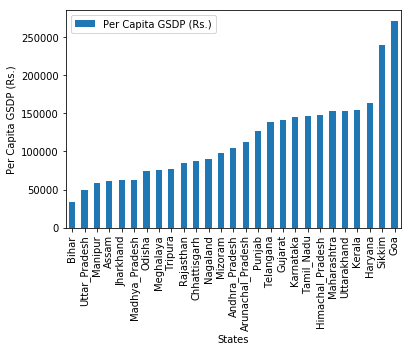

In [78]:
#sorting and plotting the dataframe according to the GSDP PER CAPITA
df=df.sort_values(by='Per Capita GSDP (Rs.)')
data= pd.DataFrame(df['Per Capita GSDP (Rs.)'])
data.plot.bar()
plt.xlabel('States')
plt.ylabel('Per Capita GSDP (Rs.)')

Top 5 highest gdp per capita states


Text(0, 0.5, 'Per Capita GSDP (Rs.)')

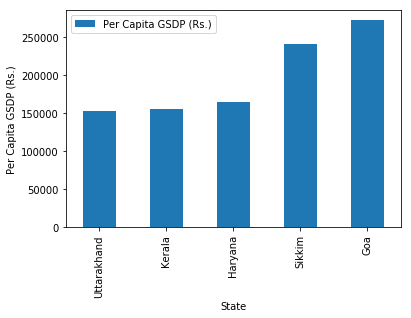

In [79]:
#Top 5 highest gdp per capita states
print('Top 5 highest gdp per capita states',)
data[-5:].plot.bar()
plt.ylabel('Per Capita GSDP (Rs.)')

Bottom 5 gdp per capita states


Text(0, 0.5, 'Per Capita GSDP (Rs.)')

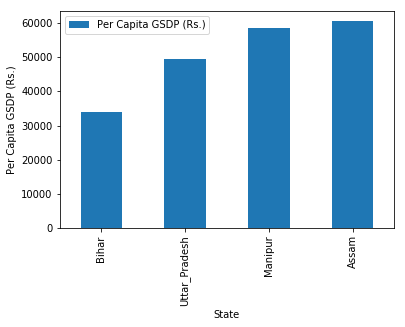

In [80]:
#Bottom 5 gdp per capita states
print('Bottom 5 gdp per capita states')
data[:4].plot.bar()
plt.ylabel('Per Capita GSDP (Rs.)')

In [81]:
#ratio of highest gdp per capita to lowest gdp per capita
print(max(data.values)/min(data.values))

[8.004741709371503]


In [82]:
#finding the percentage of contribution of data 
df['Percent_Pri']=100*(df['Primary']/df['Gross State Domestic Product'])
df['Percent_Sec']=100*(df['Secondary']/df['Gross State Domestic Product'])
df['Percent_Ter']=100*(df['Tertiary']/df['Gross State Domestic Product'])

In [83]:
df

,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,Hotels & restaurants,Livestock,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Population ('00),Primary,Public administration,Railways,"Real estate, ownership of dwelling & professional services",Road transport,Secondary,Services incidental to transport,Storage,Subsidies on products,TOTAL GSVA at basic prices,Taxes on Products,Tertiary,Trade & repair services,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport,Percent_Pri,Percent_Sec,Percent_Ter
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bihar,7951890,13599,919427,3449763,4688237,345168,1178022,653224,550132,37391988,366982,2060296,2189965,68107,4587589,33954,1101240,8019997,2078171,462413,3740641,1572288,5984896,166600,10618,2006421,36184863,3213546,22179969,7081391,7448373,3147173,2228,21.4484,16.0058,59.3174
Uttar_Pradesh,25097754,36582,1914737,11256450,16215212,2030625,3392275,380730,1404936,104337115,961104,7096876,12261649,901501,5034623,49450,2109940,25999255,6152124,1618742,14548185,3645747,25548724,16323,171696,3287219,97516938,10107396,45968959,8476139,9437243,7404509,681,24.9185,24.4867,44.0581
Manipur,383140,6288,42017,143182,226583,27490,30315,35243,45831,1.80428e+06,9313,75483,49501,NaN,317930,58442,30873,383140,297078,6,159335,58974,220173,2441,NaN,69137,1.78065e+06,92766,1.17733e+06,253637,262950,109726,NaN,21.2351,12.2028,65.2524
Assam,3855548,26223,357619,1733568,2890544,296587,543651,529539,261987,19809800,110904,173478,2002936,1471149,1795658,60621,326780,5326697,1373611,252509,1412466,507668,4033091,35739,10308,582406,18666897,1725309,9307109,2876251,2987155,1194568,4502,26.8892,20.3591,46.9823
Jharkhand,3211065,6716,323214,1789834,2094466,337489,551441,108947,445149,21710718,151163,562503,4114148,2037289,1375410,62091,349660,5248354,1088325,472702,1656784,649648,6241471,17436,306,411619,19623166,2499171,8133341,1840196,1991359,1470022,0,24.174,28.7483,37.4623
Madhya_Pradesh,16235647,26746,905381,4403151,13216013,1272905,1988794,121277,965588,48198169,303890,1932769,4368833,1618373,2747805,62989,765180,17854020,2497321,498734,2660123,1369235,10044889,36694,29012,2102800,46016269,4284700,18117360,5053625,5357515,2865802,0,37.0429,20.8408,37.5893
Odisha,6422978,15354,513531,2402396,4382636,833067,1065147,460636,791463,32197092,262766,788243,5754229,2586328,2340603,73979,435220,9009306,1318221,341494,2348714,973144,8989693,117469,22675,1209349,30255256,3151184,12256258,2886789,3149555,2034016,50349,27.9817,27.9208,38.0664
Meghalaya,366521,1443,40547,150256,223330,54473,64091,9583,61166,2.44081e+06,26247,72442,433213,84529,214211,76228,32020,451050,239782,0,150409,105783,637942,NaN,416,62112,2.28965e+06,213272,1.20066e+06,357727,383974,148189,NaN,18.4795,26.1365,49.1909
Tripura,799825,NaN,66676,177899,397591,77870,86094,168961,145096,2.96666e+06,NaN,88176,228625,142391,323287,77358,38350,942216,338244,305,190704,NaN,484393,NaN,254,94002,2.91132e+06,149345,1.48471e+06,390423,390423,155956,NaN,31.7601,16.3279,50.0464


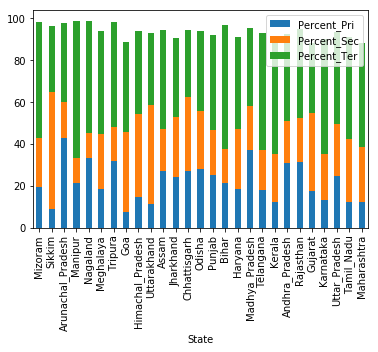

In [84]:
#plotting the to find the percentage contribution for sectors
data=df.loc[:,['Gross State Domestic Product','Percent_Pri','Percent_Sec','Percent_Ter']]
data=data.sort_values(by='Gross State Domestic Product')
data.loc[:,['Percent_Pri','Percent_Sec','Percent_Ter']].plot.bar(stacked=True)

The top five states with highest GDP


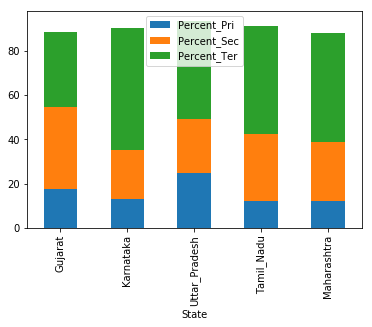

In [85]:
#Top five GDP states are 
print("The top five states with highest GDP")
data.iloc[-5:,-3:].plot.bar(stacked=True)

The bottom five gdp states are


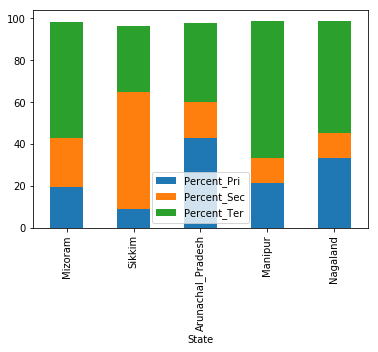

In [86]:
#Bottom five GDP states are 
print('The bottom five gdp states are')
data.iloc[:5,-3:].plot.bar(stacked=True)

In [91]:
#categorizing the state according to the GSDP
l1= list(df['Per Capita GSDP (Rs.)'].quantile([0.2,0.5,0.85,1]).astype(int))
def Category(x):
    if (x>l1[2]) & (x<=l1[3]):
        return 'C1'
    elif (x>l1[1]) & (x<=l1[2]):
        return 'C2'
    elif (x>l1[0]) & (x<=l1[1]):
        return 'C3'
    elif (x<=l1[0]):
        return 'C4'
df['Category'] = df['Per Capita GSDP (Rs.)'].apply(lambda x: Category(x))

In [92]:
print(df)

                  Agriculture, forestry and fishing Air transport  \
State                                                               
Bihar                                       7951890         13599   
Uttar_Pradesh                              25097754         36582   
Manipur                                      383140          6288   
Assam                                       3855548         26223   
Jharkhand                                   3211065          6716   
Madhya_Pradesh                             16235647         26746   
Odisha                                      6422978         15354   
Meghalaya                                    366521          1443   
Tripura                                      799825           NaN   
Rajasthan                                  15044394         13469   
Chhattisgarh                                3948847          9507   
Nagaland                                     607897          4153   
Mizoram                           

In [93]:
df_c1=df[df['Category']=='C1']
df_c2=df[df['Category']=='C2']
df_c3=df[df['Category']=='C3']
df_c4=df[df['Category']=='C4']
print(df_c1)

        Agriculture, forestry and fishing Air transport  \
State                                                     
Kerala                            5930617        125029   
Haryana                       8.01524e+06           NaN   
Sikkim                             137447             0   
Goa                                308507         46359   

        Communication & services related to broadcasting Construction  \
State                                                                   
Kerala                                            884767      7314003   
Haryana                                           479658  3.70257e+06   
Sikkim                                             12064        82058   
Goa                                                44028       165819   

               Crops Electricity, gas, water supply & other utility services  \
State                                                                          
Kerala       3070386                          

In [94]:
#Creating the dataframe for all the sub_sectors for each category
df_c1=df_c1.loc[:,['Agriculture, forestry and fishing','Mining and quarrying','Manufacturing', 'Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product']].T
df_c2=df_c2.loc[:,['Agriculture, forestry and fishing','Mining and quarrying','Manufacturing', 'Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product']].T
df_c3=df_c3.loc[:,['Agriculture, forestry and fishing','Mining and quarrying','Manufacturing', 'Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product']].T
df_c4=df_c4.loc[:,['Agriculture, forestry and fishing','Mining and quarrying','Manufacturing', 'Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product']].T

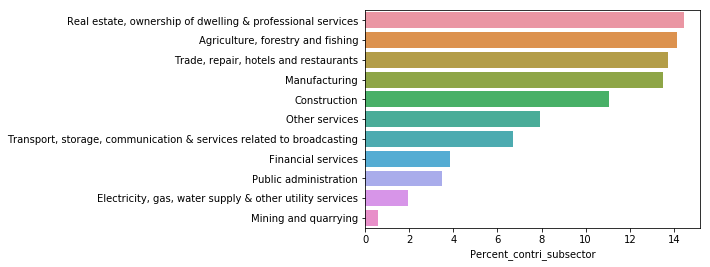

In [95]:
#finding the top 5 sub_category in C1
df_c1['sum_sub_sector']=df_c1.sum(axis=1,skipna=True)
df_c1_contri=(df_c1['sum_sub_sector'][:11]/df_c1['sum_sub_sector'][-1]*100)
df_c1_contri= df_c1_contri.to_frame()
df_c1_contri.columns=['Percent_contri_subsector']
df_c1_contri=df_c1_contri.sort_values(by='Percent_contri_subsector',ascending=False)
sns.barplot(x='Percent_contri_subsector',y=df_c1_contri.index,data=df_c1_contri)

In [96]:
#Cumulative Sum for state category c1 and the top contributing sector  for c1 which contributes to 80 percent
df_c1_contri['cum_sum']=df_c1_contri.Percent_contri_subsector.cumsum(axis=0)
data=df_c1_contri[df_c1_contri['cum_sum'] < 81]
print(data)

                                                    Percent_contri_subsector  \
Real estate, ownership of dwelling & profession...                 14.461049   
Agriculture, forestry and fishing                                  14.119213   
Trade, repair, hotels and restaurants                              13.730076   
Manufacturing                                                      13.498187   
Construction                                                       11.051090   
Other services                                                      7.907258   

                                                      cum_sum  
Real estate, ownership of dwelling & profession...  14.461049  
Agriculture, forestry and fishing                   28.580261  
Trade, repair, hotels and restaurants               42.310337  
Manufacturing                                       55.808524  
Construction                                        66.859614  
Other services                                      74.

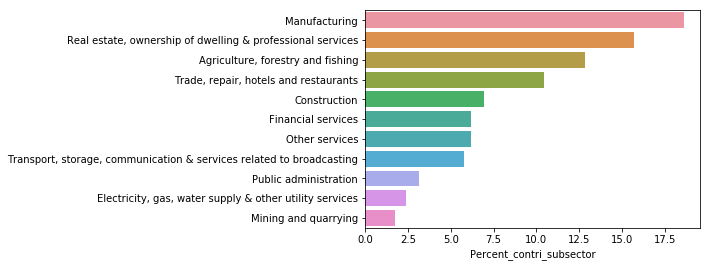

In [97]:
#finding the top 5 sub_category in C2
df_c2['sum_sub_sector']=df_c2.sum(axis=1,skipna=True)
df_c2_contri=(df_c2['sum_sub_sector'][:11]/df_c2['sum_sub_sector'][-1]*100)
df_c2_contri=df_c2_contri.to_frame()
df_c2_contri.columns=['Percent_contri_subsector']
df_c2_contri=df_c2_contri.sort_values(by='Percent_contri_subsector',ascending=False)
sns.barplot(x='Percent_contri_subsector',y=df_c2_contri.index,data=df_c2_contri)

In [98]:
#Cumulative Sum for state category c2 and the top contributing sector  for c2 which contributes to approx 80 percent
df_c2_contri['cum_sum']=df_c2_contri.Percent_contri_subsector.cumsum(axis=0)
data=df_c2_contri[df_c1_contri['cum_sum'] < 81]
print(data)

                                                    Percent_contri_subsector  \
Manufacturing                                                      18.622130   
Real estate, ownership of dwelling & profession...                 15.710184   
Agriculture, forestry and fishing                                  12.825977   
Trade, repair, hotels and restaurants                              10.443537   
Construction                                                        6.932967   
Other services                                                      6.182617   

                                                      cum_sum  
Manufacturing                                       18.622130  
Real estate, ownership of dwelling & profession...  34.332314  
Agriculture, forestry and fishing                   47.158291  
Trade, repair, hotels and restaurants               57.601828  
Construction                                        64.534795  
Other services                                      76.

C:\Users\somya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


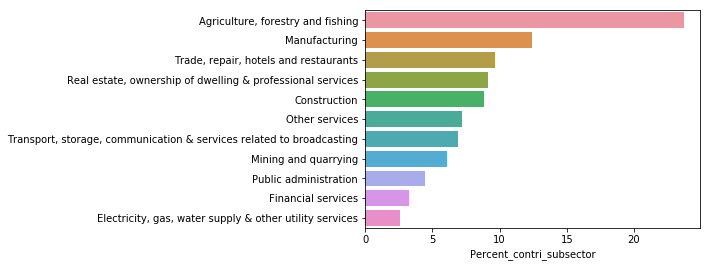

In [99]:
#finding the top 5 sub_category in C3
df_c3['sum_sub_sector']=df_c3.sum(axis=1,skipna=True)
df_c3_contri=(df_c3['sum_sub_sector'][:11]/df_c3['sum_sub_sector'][-1])*100
df_c3_contri=df_c3_contri.to_frame()
df_c3_contri.columns=['Percent_contri_subsector']
df_c3_contri=df_c3_contri.sort_values(by='Percent_contri_subsector',ascending=False)
sns.barplot(x='Percent_contri_subsector',y=df_c3_contri.index,data=df_c3_contri)

In [100]:
#Cumulative Sum for state category c1 and the top contributing sector  for c1 which contributes to 80 percent
df_c3_contri['cum_sum']=df_c3_contri.Percent_contri_subsector.cumsum(axis=0)
data=df_c3_contri[df_c3_contri['cum_sum'] < 81]
print(data)

                                                    Percent_contri_subsector  \
Agriculture, forestry and fishing                                  23.727451   
Manufacturing                                                      12.383423   
Trade, repair, hotels and restaurants                               9.690206   
Real estate, ownership of dwelling & profession...                  9.116395   
Construction                                                        8.826341   
Other services                                                      7.201032   
Transport, storage, communication & services re...                  6.872918   

                                                      cum_sum  
Agriculture, forestry and fishing                   23.727451  
Manufacturing                                       36.110875  
Trade, repair, hotels and restaurants               45.801080  
Real estate, ownership of dwelling & profession...  54.917475  
Construction                           

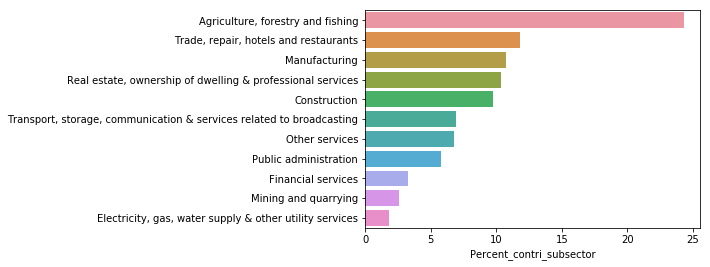

In [101]:
#finding the top 5 sub_category in C4
df_c4['sum_sub_sector']=df_c4.sum(axis=1,skipna=True)
df_c4_contri=(df_c4['sum_sub_sector'][:11]/df_c4['sum_sub_sector'][-1])*100
df_c4_contri=df_c4_contri.to_frame()
df_c4_contri.columns=['Percent_contri_subsector']
df_c4_contri=df_c4_contri.sort_values(by='Percent_contri_subsector',ascending=False)
sns.barplot(x='Percent_contri_subsector',y=df_c4_contri.index,data=df_c4_contri)

In [102]:
#Cumulative Sum for state category c4 and the top contributing sector  for c4 which contributes to 80 percent
df_c4_contri['cum_sum']=df_c4_contri.Percent_contri_subsector.cumsum(axis=0)
print(df_c4_contri[df_c4_contri['cum_sum'] < 81])

                                                    Percent_contri_subsector  \
Agriculture, forestry and fishing                                  24.323490   
Trade, repair, hotels and restaurants                              11.783216   
Manufacturing                                                      10.712459   
Real estate, ownership of dwelling & profession...                 10.365410   
Construction                                                        9.764521   
Transport, storage, communication & services re...                  6.941761   
Other services                                                      6.799089   

                                                      cum_sum  
Agriculture, forestry and fishing                   24.323490  
Trade, repair, hotels and restaurants               36.106707  
Manufacturing                                       46.819166  
Real estate, ownership of dwelling & profession...  57.184576  
Construction                           

In [103]:
df1=pd.read_csv('data2.csv')
df1.set_index('Level of Education - State',inplace=True)
df1=df1.loc[:,['Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015',]].T
df1.rename(columns={'Andhra Pradesh':'Andhra_Pradesh','Arunachal Pradesh':'Arunachal_Pradesh','Jammu and Kashmir':'Jammu_and_Kashmir','Himachal Pradesh':'Himachal_Pradesh','Madhya Pradesh':'Madhya_Pradesh','Tamil Nadu':'Tamil_Nadu','Uttar Pradesh':'Uttar_Pradesh','West Bengal':'West_Bengal'},inplace=True)
df1=df1.T
df1.rename(columns={'Primary - 2014-2015':'Primary_Dropout','Upper Primary - 2014-2015':'Upper_Primary_Dropout','Secondary - 2014-2015':'Secondary_Dropout'},inplace=True)

In [104]:
#Dropping the Union territories
df1=df1.drop(['A & N Islands','Chandigarh','Dadra & Nagar Haveli','Daman & Diu','Delhi','Lakshadweep','Puducherry','All India'])

In [105]:
df1

,Primary_Dropout,Upper_Primary_Dropout,Secondary_Dropout
Level of Education - State,,,
Andhra_Pradesh,6.72,5.20,15.71
Arunachal_Pradesh,10.82,6.71,17.11
Assam,15.36,10.51,27.06
Bihar,NaN,4.08,25.90
Chhatisgarh,2.91,5.85,21.26
Goa,0.73,0.07,11.15
Gujarat,0.89,6.41,25.04
Haryana,5.61,5.81,15.89
Himachal_Pradesh,0.64,0.87,6.07


In [106]:
new_df=df['Gross State Domestic Product']
new_df1= df1.merge(new_df,how='inner',left_index=True,right_index=True)
new_df1

,Primary_Dropout,Upper_Primary_Dropout,Secondary_Dropout,Gross State Domestic Product
Andhra_Pradesh,6.72,5.20,15.71,52646842
Arunachal_Pradesh,10.82,6.71,17.11,1676119
Assam,15.36,10.51,27.06,19809800
Bihar,NaN,4.08,25.90,37391988
Goa,0.73,0.07,11.15,4063307
Gujarat,0.89,6.41,25.04,8.95027e+07
Haryana,5.61,5.81,15.89,4.37462e+07
Himachal_Pradesh,0.64,0.87,6.07,10436879
Jharkhand,5.48,8.99,24.00,21710718
Karnataka,2.02,3.85,26.18,92178806


In [107]:
print(new_df1)

                   Primary_Dropout  Upper_Primary_Dropout  Secondary_Dropout  \
Andhra_Pradesh                6.72                   5.20              15.71   
Arunachal_Pradesh            10.82                   6.71              17.11   
Assam                        15.36                  10.51              27.06   
Bihar                          NaN                   4.08              25.90   
Goa                           0.73                   0.07              11.15   
Gujarat                       0.89                   6.41              25.04   
Haryana                       5.61                   5.81              15.89   
Himachal_Pradesh              0.64                   0.87               6.07   
Jharkhand                     5.48                   8.99              24.00   
Karnataka                     2.02                   3.85              26.18   
Kerala                         NaN                    NaN              12.32   
Madhya_Pradesh                6.59      

                 Primary_Dropout
Primary_Dropout              1.0


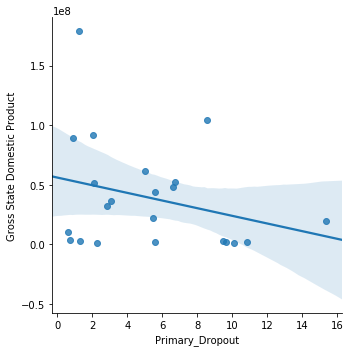

In [108]:
#finding Correlation between Primary_Dropout_rate and GSDP
print(new_df1[['Primary_Dropout','Gross State Domestic Product']].corr())
sns.lmplot(x='Primary_Dropout',y='Gross State Domestic Product',data=new_df1)

                   Secondary_Dropout
Secondary_Dropout                1.0


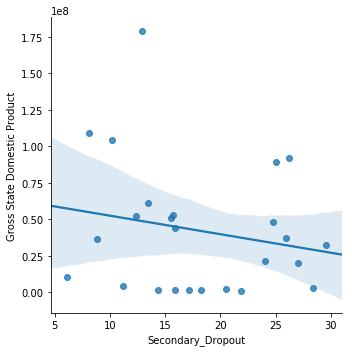

In [109]:
print(new_df1[['Secondary_Dropout','Gross State Domestic Product']].corr())
sns.lmplot(x='Secondary_Dropout',y='Gross State Domestic Product',data=new_df1)

                       Upper_Primary_Dropout
Upper_Primary_Dropout                    1.0


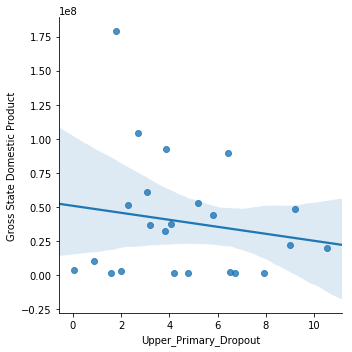

In [110]:
print(new_df1[['Upper_Primary_Dropout','Gross State Domestic Product']].corr())
sns.lmplot(x='Upper_Primary_Dropout',y='Gross State Domestic Product',data=new_df1)